In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("twitter.csv")

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data.columns = ['textID', 'sentiment', 'author', 'new_text', 'text', 'aux_id', 'new_sentiment', 'selected_text']

In [5]:
data

,textID,sentiment,author,new_text,text,aux_id,new_sentiment,selected_text
0,p1000000000,neutral,xoshayzers,i know i was listenin to bad habit earlier a...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,i know i was listenin to bad habit earlier an...
1,p1000000001,negative,ShansBee,"I should be sleep, but im not! thinking about ...","I should be sleep, but im not! thinking about ...",p1000000001,NaN,scandalous!
2,2dfbe0b7fb,negative,mcsleazy,Hmmm. http://www.djhero.com/ is down,Hmmm. http://www.djhero.com/ is down,2dfbe0b7fb,negative,down
3,6d846d7d50,negative,Ingenue_Em,I`m sorry at least it`s Friday?,@kelcouch I'm sorry at least it's Friday?,6d846d7d50,negative,sorry
4,p1000000002,negative,Sim_34,The storm is here and the electricity is gone,The storm is here and the electricity is gone,p1000000002,NaN,the storm is here and the electricity is gone
...,...,...,...,...,...,...,...,...
12515,p1000008982,neutral,ABZQuine,"not really just leaving flat now, on the look...","@Astronick not really just leaving flat now, o...",p1000008982,NaN,"not really just leaving flat now, on the look..."
12516,p1000008983,neutral,kdpaine,I think the lesson of the day is not to have ...,@shonali I think the lesson of the day is not ...,p1000008983,NaN,i think the lesson of the day is not to have ...
12517,p1000008984,neutral,bushidosan,"haha, yeah. Twitter has many uses. For me it`...","@sendsome2me haha, yeah. Twitter has many uses...",p1000008984,NaN,"haha, yeah. twitter has many uses. for me it`..."
12518,bd499c0bf7,positive,courtside101,Succesfully following Tayla!!,Succesfully following Tayla!!,bd499c0bf7,positive,succesfully


In [6]:
df = data.drop(columns = ['textID', 'author', 'new_text', 'aux_id', 'new_sentiment', 'selected_text'])

In [7]:
df

,sentiment,text
0,neutral,@tiffanylue i know i was listenin to bad habi...
1,negative,"I should be sleep, but im not! thinking about ..."
2,negative,Hmmm. http://www.djhero.com/ is down
3,negative,@kelcouch I'm sorry at least it's Friday?
4,negative,The storm is here and the electricity is gone
...,...,...
12515,neutral,"@Astronick not really just leaving flat now, o..."
12516,neutral,@shonali I think the lesson of the day is not ...
12517,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
12518,positive,Succesfully following Tayla!!


In [8]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of       sentiment                                               text
0       neutral  @tiffanylue i know  i was listenin to bad habi...
1      negative  I should be sleep, but im not! thinking about ...
2      negative               Hmmm. http://www.djhero.com/ is down
3      negative         @kelcouch I'm sorry  at least it's Friday?
4      negative      The storm is here and the electricity is gone
...         ...                                                ...
12515   neutral  @Astronick not really just leaving flat now, o...
12516   neutral  @shonali I think the lesson of the day is not ...
12517   neutral  @sendsome2me haha, yeah. Twitter has many uses...
12518  positive                      Succesfully following Tayla!!
12519   neutral                                   @JohnLloydTaylor

[12520 rows x 2 columns]>

In [10]:
df.info

<bound method DataFrame.info of       sentiment                                               text
0       neutral  @tiffanylue i know  i was listenin to bad habi...
1      negative  I should be sleep, but im not! thinking about ...
2      negative               Hmmm. http://www.djhero.com/ is down
3      negative         @kelcouch I'm sorry  at least it's Friday?
4      negative      The storm is here and the electricity is gone
...         ...                                                ...
12515   neutral  @Astronick not really just leaving flat now, o...
12516   neutral  @shonali I think the lesson of the day is not ...
12517   neutral  @sendsome2me haha, yeah. Twitter has many uses...
12518  positive                      Succesfully following Tayla!!
12519   neutral                                   @JohnLloydTaylor

[12520 rows x 2 columns]>

In [11]:
df.shape

(12520, 2)

In [12]:
sentiment_mapping = {
    'negative': -1,
    'neutral': 0,
    'positive':1
}

In [13]:
df['label'] = df['sentiment'].map(sentiment_mapping)

In [14]:
df

,sentiment,text,label
0,neutral,@tiffanylue i know i was listenin to bad habi...,0
1,negative,"I should be sleep, but im not! thinking about ...",-1
2,negative,Hmmm. http://www.djhero.com/ is down,-1
3,negative,@kelcouch I'm sorry at least it's Friday?,-1
4,negative,The storm is here and the electricity is gone,-1
...,...,...,...
12515,neutral,"@Astronick not really just leaving flat now, o...",0
12516,neutral,@shonali I think the lesson of the day is not ...,0
12517,neutral,"@sendsome2me haha, yeah. Twitter has many uses...",0
12518,positive,Succesfully following Tayla!!,1


In [15]:
df.dtypes

sentiment    object
text         object
label         int64
dtype: object

In [16]:
df.head()

,sentiment,text,label
0,neutral,@tiffanylue i know i was listenin to bad habi...,0
1,negative,"I should be sleep, but im not! thinking about ...",-1
2,negative,Hmmm. http://www.djhero.com/ is down,-1
3,negative,@kelcouch I'm sorry at least it's Friday?,-1
4,negative,The storm is here and the electricity is gone,-1


In [17]:
df.tail()

,sentiment,text,label
12515,neutral,"@Astronick not really just leaving flat now, o...",0
12516,neutral,@shonali I think the lesson of the day is not ...,0
12517,neutral,"@sendsome2me haha, yeah. Twitter has many uses...",0
12518,positive,Succesfully following Tayla!!,1
12519,neutral,@JohnLloydTaylor,0


In [18]:
sentiment_counts = df['label'].value_counts()
sentiment_counts

label
-1    4334
 0    4219
 1    3967
Name: count, dtype: int64

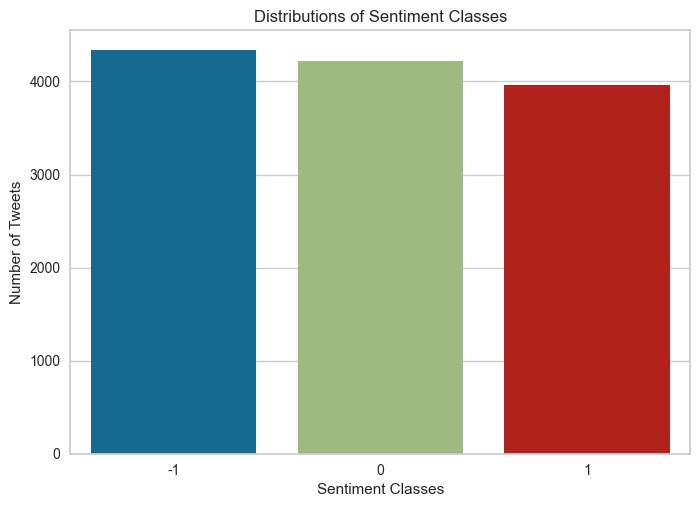

In [19]:
sns.barplot(x = sentiment_counts.index, y = sentiment_counts.values)
plt.xlabel("Sentiment Classes")
plt.ylabel("Number of Tweets")
plt.title("Distributions of Sentiment Classes")
plt.show()

In [20]:
df['tweet_len'] = df['text'].apply(len)
df

,sentiment,text,label,tweet_len
0,neutral,@tiffanylue i know i was listenin to bad habi...,0,92
1,negative,"I should be sleep, but im not! thinking about ...",-1,132
2,negative,Hmmm. http://www.djhero.com/ is down,-1,36
3,negative,@kelcouch I'm sorry at least it's Friday?,-1,42
4,negative,The storm is here and the electricity is gone,-1,45
...,...,...,...,...
12515,neutral,"@Astronick not really just leaving flat now, o...",0,124
12516,neutral,@shonali I think the lesson of the day is not ...,0,61
12517,neutral,"@sendsome2me haha, yeah. Twitter has many uses...",0,108
12518,positive,Succesfully following Tayla!!,1,29


Text(0.5, 1.0, 'Distributions of Tweet lengths by Sentiment')

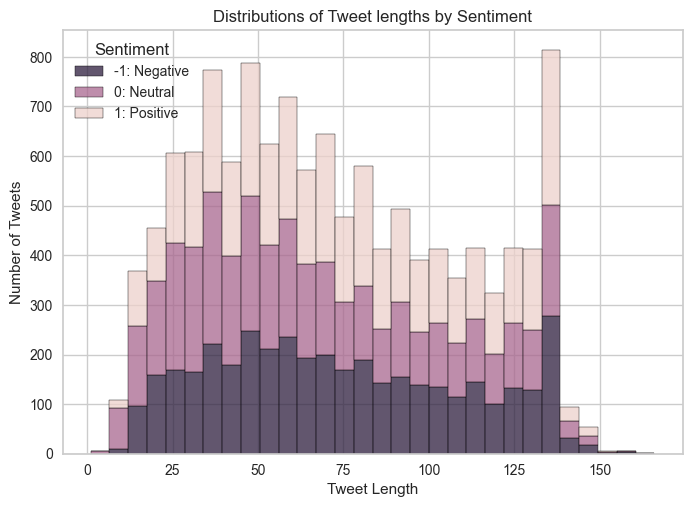

In [21]:
label_names = ['-1: Negative', '0: Neutral', '1: Positive']
sns.histplot(data = df, x = "tweet_len", hue='label', multiple="stack", bins = 30)
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", labels=label_names)
plt.title("Distributions of Tweet lengths by Sentiment")

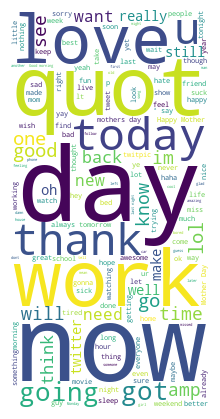

In [22]:
all_text = " ".join(df['text'])
wordcloud = WordCloud(width=200, height=400, background_color='white', max_words=150).generate(all_text)
plt.figure(figsize=(4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [23]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove usernames
    text = re.sub(r'@\w+', '', text)

    # Remove non-alphabetic characters and make lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
        
    # Join the preprocessed words back into a string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [24]:
df['new_text'] = df['text'].apply(preprocess_text)

In [25]:
df

,sentiment,text,label,tweet_len,new_text
0,neutral,@tiffanylue i know i was listenin to bad habi...,0,92,know listenin bad habit earlier started freaki...
1,negative,"I should be sleep, but im not! thinking about ...",-1,132,sleep im thinking old friend want married damn...
2,negative,Hmmm. http://www.djhero.com/ is down,-1,36,hmmm
3,negative,@kelcouch I'm sorry at least it's Friday?,-1,42,sorry least friday
4,negative,The storm is here and the electricity is gone,-1,45,storm electricity gone
...,...,...,...,...,...
12515,neutral,"@Astronick not really just leaving flat now, o...",0,124,really leaving flat lookout lunch fancy wee st...
12516,neutral,@shonali I think the lesson of the day is not ...,0,61,think lesson day luggage
12517,neutral,"@sendsome2me haha, yeah. Twitter has many uses...",0,108,haha yeah twitter many us know ppl care
12518,positive,Succesfully following Tayla!!,1,29,succesfully following tayla


In [26]:
#Word Frequency analysis
def get_word_frequencies(text):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq

In [27]:
sentiment_text = df.groupby('label')["text"].apply(lambda x: ''.join(x))
sentiment_text

label
-1    I should be sleep, but im not! thinking about ...
 0    @tiffanylue i know  i was listenin to bad habi...
 1    @DavidArchie &lt;3 your gonna be the first  tw...
Name: text, dtype: object

In [28]:
sentiment_word_freq = sentiment_text.apply(get_word_frequencies)
sentiment_word_freq

label
-1    {'I': 1969, 'should': 80, 'be': 331, 'sleep': ...
 0    {'@': 2330, 'tiffanylue': 1, 'i': 628, 'know':...
 1    {'@': 2195, 'DavidArchie': 3, '&': 436, 'lt': ...
Name: text, dtype: object

In [29]:
for sentiment, word_freq in sentiment_word_freq.items():
    print(f"Sentiment: {sentiment} ")
    print("Top 10 common words:")
    for word, freq in word_freq.most_common(10):
        print(f"{word} : {freq}")
    print()

Sentiment: -1 
Top 10 common words:
! : 2019
. : 2013
I : 1969
@ : 1921
to : 1615
, : 1318
the : 1284
a : 1029
i : 937
my : 933

Sentiment: 0 
Top 10 common words:
@ : 2330
! : 1696
. : 1436
to : 1348
? : 1329
I : 1327
the : 1191
, : 1189
a : 848
you : 663

Sentiment: 1 
Top 10 common words:
! : 3003
@ : 2195
. : 1619
I : 1312
to : 1291
, : 1240
the : 1197
a : 987
you : 820
and : 693



In [30]:
#Splitting the dataset
X = df['new_text']
y = df['label']

In [31]:
X

0        know listenin bad habit earlier started freaki...
1        sleep im thinking old friend want married damn...
2                                                     hmmm
3                                       sorry least friday
4                                   storm electricity gone
                               ...                        
12515    really leaving flat lookout lunch fancy wee st...
12516                             think lesson day luggage
12517              haha yeah twitter many us know ppl care
12518                          succesfully following tayla
12519                                                     
Name: new_text, Length: 12520, dtype: object

In [32]:
y

0        0
1       -1
2       -1
3       -1
4       -1
        ..
12515    0
12516    0
12517    0
12518    1
12519    0
Name: label, Length: 12520, dtype: int64

In [33]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
#Feature ExtracAssertion
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer()

In [35]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_text)

In [36]:
#Model Training and EvaluaAssertionError
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier

SVC(C=1, kernel='linear')

In [37]:
svm_classifier.fit(X_train_vec, y_train)
svm_classifier

SVC(C=1, kernel='linear')

In [38]:
y_pred = svm_classifier.predict(X_test_vec)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")
print(classification_report(y_test, y_pred))

Accuracy:  0.58
              precision    recall  f1-score   support

          -1       0.61      0.63      0.62      1104
           0       0.52      0.50      0.51      1087
           1       0.63      0.62      0.63       939

    accuracy                           0.58      3130
   macro avg       0.58      0.59      0.58      3130
weighted avg       0.58      0.58      0.58      3130



In [40]:
# Create a Logistic Regression model
logreg = LogisticRegression()
logreg

LogisticRegression()

In [41]:
# Train the Logistic Regression model on the training data
logreg.fit(X_train_vec, y_train)

C:\Users\ishup\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Predict labels for the test data
y_pred_logreg = logreg.predict(X_test_vec)

In [43]:
# Calculate accuracy score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print the accuracy score
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.58
              precision    recall  f1-score   support

          -1       0.61      0.63      0.62      1104
           0       0.52      0.49      0.50      1087
           1       0.62      0.63      0.63       939

    accuracy                           0.58      3130
   macro avg       0.58      0.58      0.58      3130
weighted avg       0.58      0.58      0.58      3130



In [44]:
# Create a Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes

MultinomialNB()

In [45]:
naive_bayes.fit(X_train_vec, y_train)
naive_bayes

MultinomialNB()

In [46]:
naive_pred = naive_bayes.predict(X_test_vec)
naive_pred

array([ 0,  1,  0, ..., -1,  1,  1], dtype=int64)

In [47]:
naive_acc = accuracy_score(y_test, naive_pred)
print("Naive Bayes Classifier Accuracy score ", naive_acc)
print(classification_report(y_test, naive_pred))

Naive Bayes Classifier Accuracy score  0.544408945686901
              precision    recall  f1-score   support

          -1       0.54      0.73      0.62      1104
           0       0.51      0.29      0.37      1087
           1       0.58      0.62      0.60       939

    accuracy                           0.54      3130
   macro avg       0.54      0.55      0.53      3130
weighted avg       0.54      0.54      0.53      3130



In [48]:
random_forest = RandomForestClassifier()
random_forest

RandomForestClassifier()

In [49]:
random_forest.fit(X_train_vec, y_train)
random_forest

RandomForestClassifier()

In [50]:
y_rand_pred = random_forest.predict(X_test_vec)
rand_accuracy = accuracy_score(y_test, y_rand_pred)
print("The accuracy score for Random Forest ", rand_accuracy)
print(classification_report(y_test, y_rand_pred))

The accuracy score for Random Forest  0.5862619808306709
              precision    recall  f1-score   support

          -1       0.62      0.58      0.60      1104
           0       0.52      0.54      0.53      1087
           1       0.62      0.65      0.63       939

    accuracy                           0.59      3130
   macro avg       0.59      0.59      0.59      3130
weighted avg       0.59      0.59      0.59      3130



In [95]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier

KNeighborsClassifier()

In [96]:
knn_classifier.fit(X_train_vec, y_train)
knn_classifier

KNeighborsClassifier()

In [97]:
y_knn_pred = knn_classifier.predict(X_test_vec)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print("The Accuracy score for KNN Classifier ", knn_accuracy)
print(classification_report(y_test, y_knn_pred))

The Accuracy score for KNN Classifier  0.39840255591054313
              precision    recall  f1-score   support

          -1       0.67      0.06      0.11      1104
           0       0.36      0.95      0.53      1087
           1       0.79      0.16      0.26       939

    accuracy                           0.40      3130
   macro avg       0.61      0.39      0.30      3130
weighted avg       0.60      0.40      0.30      3130



In [98]:
#Predicting Sentiment for new tweets
new_tweets = [
    "Just had the most amazing dinner with friends! Love spending quality time together. 😊🍕 #GoodTimes",
    "What a beautiful day! The sun is shining, and I'm feeling grateful for everything. ☀️🌼",
    "Today has been a terrible day. Everything went wrong, and I can't catch a break. 😔 #BadLuck",
    "Feeling really down and frustrated. Sometimes life just throws curveballs that are hard to handle.",
    "I aced my final exams! Hard work pays off, and I couldn't be happier. 🎉📚 #Success",
    "This movie was absolutely fantastic! The plot, acting, and visuals were all top-notch. #MovieNight",
    "I'm so excited for the upcoming vacation! Can't wait to relax by the beach and unwind. 🌴✈️ #Travel",
    "My laptop crashed right before I could finish my assignment. What a disaster! 💻🤦‍♂️ #TechProblems",
    "The traffic is unbearable today. Late for an important meeting and stressed out. 🚗🤯 #TrafficJam",
    "Just finished my daily workout at the gym. Feeling a bit tired but accomplished. 💪🏋️‍♀️ #Fitness",
    "Trying out a new recipe in the kitchen today. Fingers crossed it turns out delicious! 🍳👨‍🍳 #Cooking",
    "The weather outside is neither too hot nor too cold. Just perfect for a leisurely stroll. 🌦️🚶‍♀️ #Weather",
    "I'm so disappointed with the customer service I received. They were unhelpful and rude. 😡 #CustomerExperience",
    "Enjoying a quiet evening at home with a good book. Sometimes, it's nice to unwind. 📖🏡 #Relaxation"
    "Attended a seminar on data analytics. Learned a lot of useful insights for my work. #Learning"
  
]

In [99]:
preprocessed_new_tweets = [preprocess_text(tweet) for tweet in new_tweets]
new_tweets_vec = vectorizer.transform(preprocessed_new_tweets)

all_predictions = {}

svm_pred = svm_classifier.predict(new_tweets_vec)
log_pred = logreg.predict(new_tweets_vec)
naive_new_pred = naive_bayes.predict(new_tweets_vec)
rand_new_pred  = random_forest.predict(new_tweets_vec)
knn_new_pred = knn_classifier.predict(new_tweets_vec)
# Create Result DataFrame
# Create a DataFrame for predictions
result_df = pd.DataFrame({
    "SVM_Prediction": svm_pred,
    "Logistic_Prediction": log_pred,
    "Naive Bayes": naive_new_pred,
    "Random Forest": rand_new_pred,
    "KNN Classifier": knn_new_pred
})

# Concatenate the predictions DataFrame with the original new_tweets DataFrame
result_df = pd.concat([pd.DataFrame({"Tweet": new_tweets}), result_df], axis=1)

In [100]:
result_df

,Tweet,SVM_Prediction,Logistic_Prediction,Naive Bayes,Random Forest,KNN Classifier
0,Just had the most amazing dinner with friends!...,1,1,1,1,0
1,"What a beautiful day! The sun is shining, and ...",1,1,1,1,0
2,Today has been a terrible day. Everything went...,-1,-1,-1,-1,0
3,Feeling really down and frustrated. Sometimes ...,-1,-1,-1,-1,0
4,"I aced my final exams! Hard work pays off, and...",-1,-1,-1,-1,0
5,"This movie was absolutely fantastic! The plot,...",1,1,1,0,0
6,I'm so excited for the upcoming vacation! Can'...,1,1,1,1,0
7,My laptop crashed right before I could finish ...,0,0,-1,0,0
8,The traffic is unbearable today. Late for an i...,-1,-1,-1,-1,0
9,Just finished my daily workout at the gym. Fee...,-1,-1,-1,-1,0


In [101]:
sns.set(style = "whitegrid")

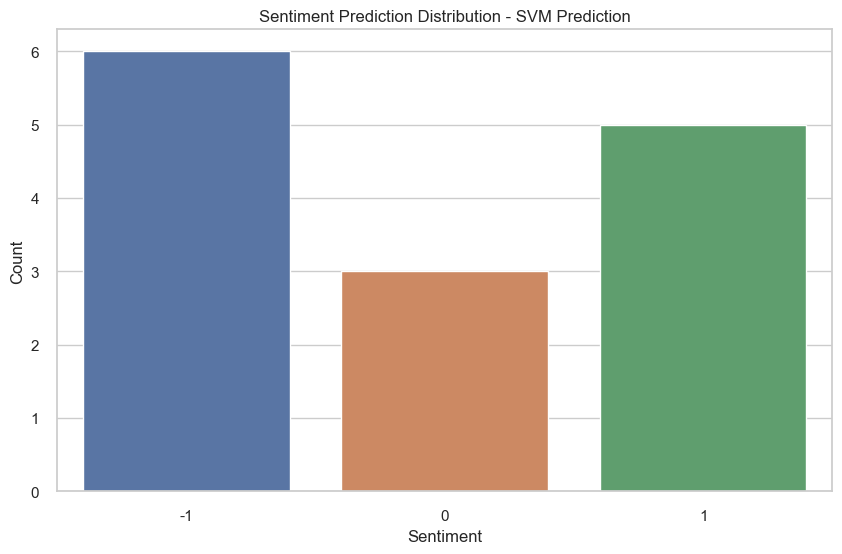

In [102]:
#Bar Plot for the number of each sentiment all_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'SVM_Prediction')
plt.title("Sentiment Prediction Distribution - SVM Prediction")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

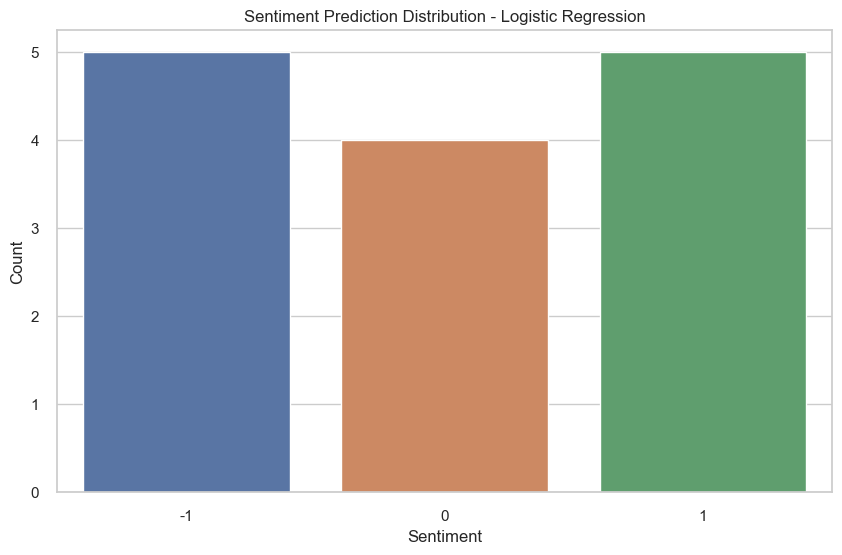

In [103]:
#Bar Plot for the number of each ssentiment pall_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'Logistic_Prediction')
plt.title("Sentiment Prediction Distribution - Logistic Regression")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

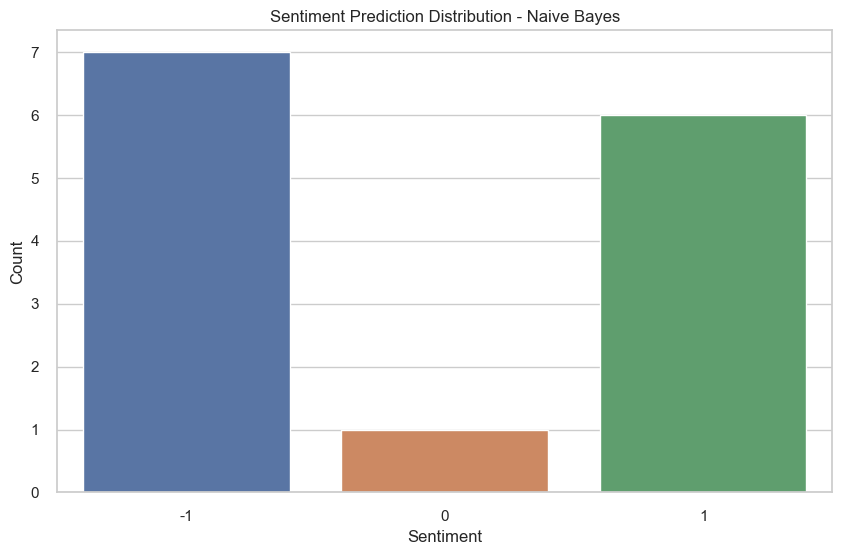

In [104]:
#Bar Plot for the number of each ssentiment pall_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'Naive Bayes')
plt.title("Sentiment Prediction Distribution - Naive Bayes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

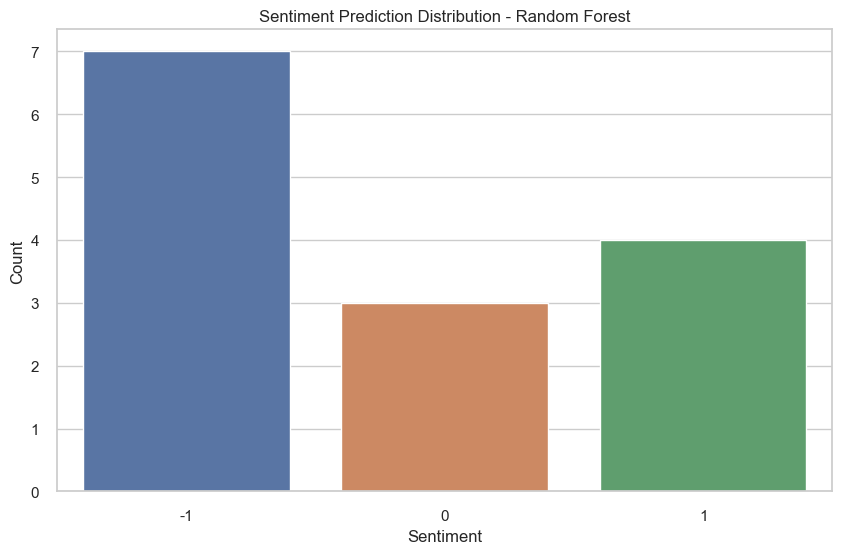

In [105]:
#Bar Plot for the number of each ssentiment pall_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'Random Forest')
plt.title("Sentiment Prediction Distribution - Random Forest")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

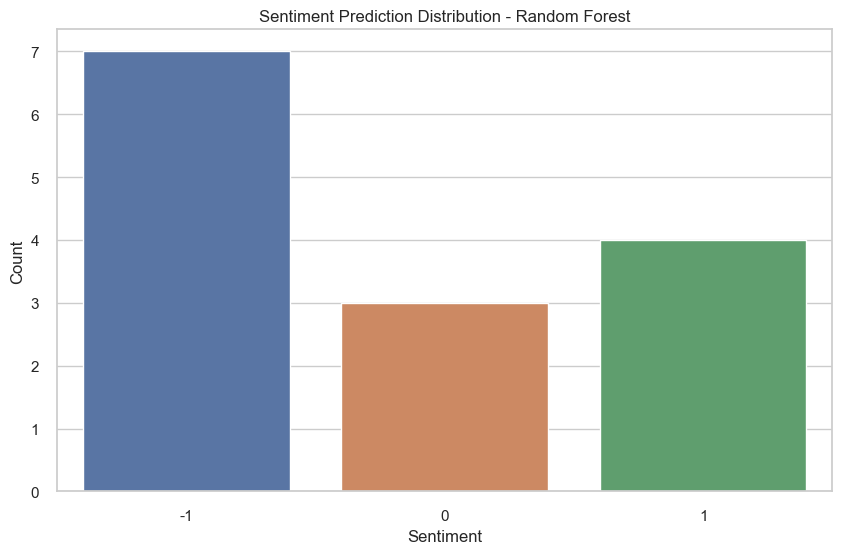

In [106]:
#Bar Plot for the number of each ssentiment pall_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'Random Forest')
plt.title("Sentiment Prediction Distribution - Random Forest")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

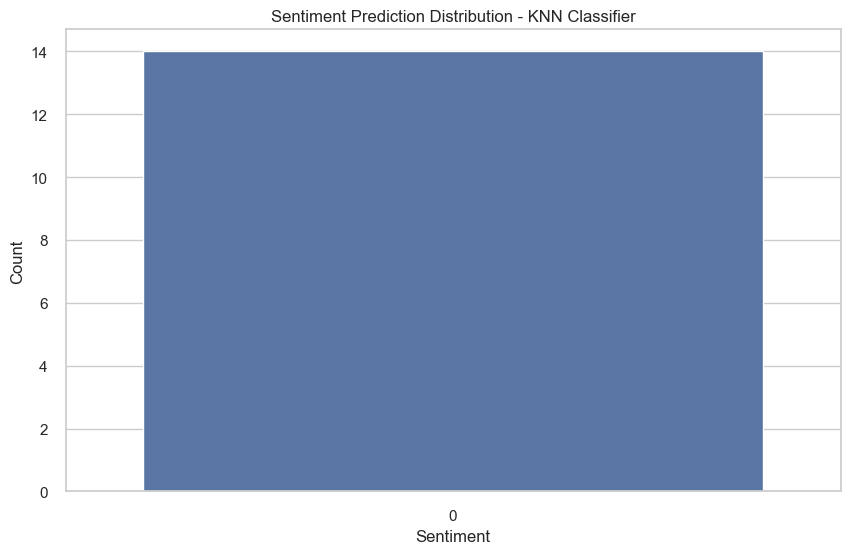

In [107]:
#Bar Plot for the number of each ssentiment pall_predictions
plt.figure(figsize=(10,6))
sns.countplot(data = result_df, x = 'KNN Classifier')
plt.title("Sentiment Prediction Distribution - KNN Classifier")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

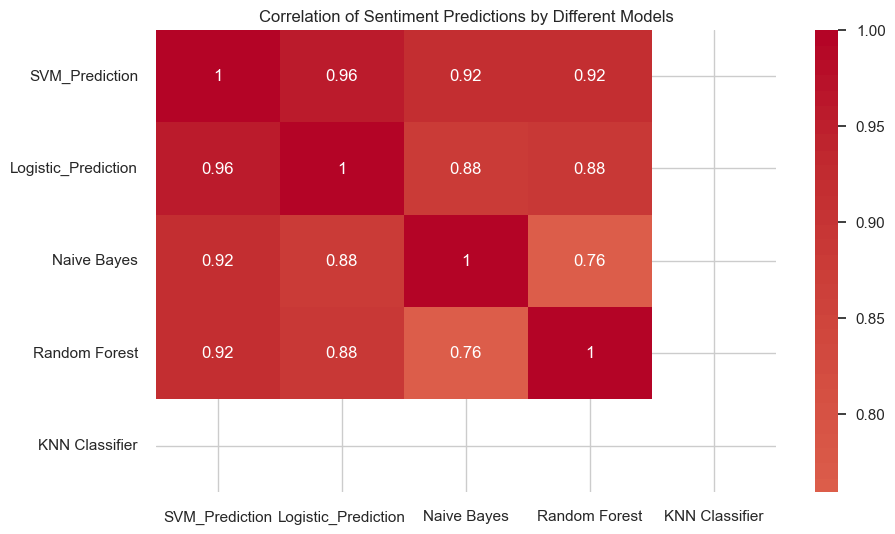

In [94]:
#Heatmap to Visualise the correlation of predictions by different models
pred_cols = ["SVM_Prediction", "Logistic_Prediction", "Naive Bayes", "Random Forest", "KNN Classifier"]
correlation_matrix = result_df[pred_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
plt.title("Correlation of Sentiment Predictions by Different Models")
plt.show()